In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
trafficdf = pd.read_csv("KSI_ClEAN.csv")
trafficdf.head()

,ACCNUM,YEAR,MONTH,DAY,HOUR,MINUTES,WEEKDAY,LATITUDE,LONGITUDE,Ward_Name,...,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,FATAL
0,1249781,2011,8,4,23,18,3,43.651545,-79.383490,Toronto Centre-Rosedale (27),...,0,1,0,0,0,0,0,0,0,0
1,1311542,2012,8,19,23,18,6,43.780445,-79.300490,Scarborough-Agincourt (40),...,0,0,0,1,1,1,0,0,0,0
2,5002235651,2015,12,30,23,39,2,43.682342,-79.328266,Toronto-Danforth (30),...,0,0,0,0,0,1,0,0,0,1
3,1311542,2012,8,19,23,18,6,43.780445,-79.300490,Scarborough-Agincourt (40),...,0,0,0,1,1,1,0,0,0,0
4,1311542,2012,8,19,23,18,6,43.780445,-79.300490,Scarborough-Agincourt (40),...,0,0,0,1,1,1,0,0,0,0


In [3]:
apt_df = pd.read_csv("Toronto_apartment_rentals_2018.csv")

In [4]:
apt_df.columns

Index(['Bedroom', 'Bathroom', 'Den', 'Address', 'Lat', 'Long', 'Price'], dtype='object')

In [5]:
new_apt_df = apt_df[["Lat", "Long"]].round(3)

In [6]:
trafficdf.columns

Index(['ACCNUM', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTES', 'WEEKDAY',
       'LATITUDE', 'LONGITUDE', 'Ward_Name', 'Ward_ID', 'Hood_Name', 'Hood_ID',
       'Division', 'District', 'STREET1', 'STREET2', 'OFFSET', 'ROAD_CLASS',
       'LOCCOORD', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND',
       'ACCLASS', 'IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY', 'FATAL_NO',
       'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND', 'PEDTYPE',
       'PEDACT', 'PEDCOND', 'CYCLISTYPE', 'CYCACT', 'CYCCOND', 'PEDESTRIAN',
       'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH',
       'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL',
       'DISABILITY', 'FATAL'],
      dtype='object')

In [7]:
ped_df = trafficdf.loc[trafficdf['IMPACTYPE'] == 'Pedestrian Collisions']
ped_df.head()

,ACCNUM,YEAR,MONTH,DAY,HOUR,MINUTES,WEEKDAY,LATITUDE,LONGITUDE,Ward_Name,...,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,FATAL
0,1249781,2011,8,4,23,18,3,43.651545,-79.383490,Toronto Centre-Rosedale (27),...,0,1,0,0,0,0,0,0,0,0
1,1311542,2012,8,19,23,18,6,43.780445,-79.300490,Scarborough-Agincourt (40),...,0,0,0,1,1,1,0,0,0,0
2,5002235651,2015,12,30,23,39,2,43.682342,-79.328266,Toronto-Danforth (30),...,0,0,0,0,0,1,0,0,0,1
3,1311542,2012,8,19,23,18,6,43.780445,-79.300490,Scarborough-Agincourt (40),...,0,0,0,1,1,1,0,0,0,0
4,1311542,2012,8,19,23,18,6,43.780445,-79.300490,Scarborough-Agincourt (40),...,0,0,0,1,1,1,0,0,0,0


In [8]:
year_ped = ped_df.groupby(['YEAR'])

In [9]:
year_ped['YEAR'].count()

YEAR
2007    510
2008    498
2009    515
2010    481
2011    489
2012    513
2013    540
2014    341
2015    365
2016    408
2017    344
Name: YEAR, dtype: int64

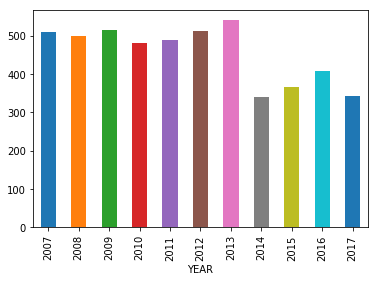

In [10]:
ped_graph = year_ped['YEAR'].count()
ped_graph.plot(kind = "bar")

In [11]:
bike_df = trafficdf.loc[trafficdf['IMPACTYPE'] == 'Cyclist Collisions']

In [12]:
year_bike = bike_df.groupby(["YEAR"])

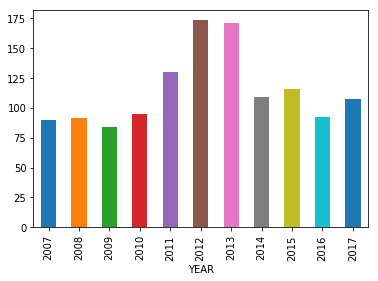

In [13]:
bike_graph = year_bike["YEAR"].count()
bike_graph.plot(kind = "bar")



In [14]:
red_light = pd.read_csv("Red Light Cameras Data.csv")

In [15]:
red_light

,_id,INTERSECTION_ID,LINEAR_NAME_FULL_1,LINEAR_NAME_FULL_2,ID,X,Y,LONGITUDE,LATITUDE,OBJECTID,geometry
0,534,13465959.0,Richmond St E,Parliament St,1,315768.179,4834966.252,-79.364023,43.654559,1,"{u'type': u'Point', u'coordinates': (-79.36402..."
1,535,13467993.0,Lake Shore Blvd W,York St,2,314411.515,4833508.939,-79.380868,43.641460,2,"{u'type': u'Point', u'coordinates': (-79.38086..."
2,536,13444656.0,Steeles Ave W,Carpenter Rd,3,309017.922,4850229.154,-79.447589,43.792013,3,"{u'type': u'Point', u'coordinates': (-79.44758..."
3,537,13444138.0,Steeles Ave W,Hilda Ave,4,310492.057,4850673.973,-79.429267,43.796007,4,"{u'type': u'Point', u'coordinates': (-79.42926..."
4,538,13451893.0,Albion Rd,Silverstone Dr,5,296738.069,4844782.178,-79.600094,43.742952,5,"{u'type': u'Point', u'coordinates': (-79.60009..."
5,539,13459576.0,Dixon Rd,Kipling Ave,6,300072.370,4839368.290,-79.558649,43.694249,6,"{u'type': u'Point', u'coordinates': (-79.55864..."
6,540,13448601.0,Steeles Ave W,Islington Ave,7,298771.768,4847156.495,-79.574871,43.764343,7,"{u'type': u'Point', u'coordinates': (-79.57487..."
7,541,13450231.0,Sheppard Ave W,Wilson Heights Blvd,8,308282.925,4845745.977,-79.456751,43.751663,8,"{u'type': u'Point', u'coordinates': (-79.45675..."
8,542,13449607.0,Bathurst St,Sheppard Ave W,9,309753.930,4846168.518,-79.438481,43.755458,9,"{u'type': u'Point', u'coordinates': (-79.43848..."
9,543,13455749.0,Lawrence Ave W,Marlee Ave,10,309109.431,4841741.672,-79.446520,43.715615,10,"{u'type': u'Point', u'coordinates': (-79.44652..."


In [16]:
ped_df['Intersection'] = ped_df["STREET1"] + ped_df["STREET2"]

/Users/scott/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
ped_df

,ACCNUM,YEAR,MONTH,DAY,HOUR,MINUTES,WEEKDAY,LATITUDE,LONGITUDE,Ward_Name,...,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,FATAL,Intersection
0,1249781,2011,8,4,23,18,3,43.651545,-79.383490,Toronto Centre-Rosedale (27),...,1,0,0,0,0,0,0,0,0,QUEEN ST WYORK ST
1,1311542,2012,8,19,23,18,6,43.780445,-79.300490,Scarborough-Agincourt (40),...,0,0,1,1,1,0,0,0,0,SHEPPARD AVE EAMETHYST RD
2,5002235651,2015,12,30,23,39,2,43.682342,-79.328266,Toronto-Danforth (30),...,0,0,0,0,1,0,0,0,1,DANFORTH AVEGILLARD AVE
3,1311542,2012,8,19,23,18,6,43.780445,-79.300490,Scarborough-Agincourt (40),...,0,0,1,1,1,0,0,0,0,SHEPPARD AVE EAMETHYST RD
4,1311542,2012,8,19,23,18,6,43.780445,-79.300490,Scarborough-Agincourt (40),...,0,0,1,1,1,0,0,0,0,SHEPPARD AVE EAMETHYST RD
5,1311542,2012,8,19,23,18,6,43.780445,-79.300490,Scarborough-Agincourt (40),...,0,0,1,1,1,0,0,0,0,SHEPPARD AVE EAMETHYST RD
6,7001903704,2017,10,20,23,18,4,43.625201,-79.528515,Etobicoke-Lakeshore (5),...,0,0,0,0,1,0,0,0,0,KIPLING AVENORTH QUEEN ST
7,7001903704,2017,10,20,23,18,4,43.625201,-79.528515,Etobicoke-Lakeshore (5),...,0,0,0,0,1,0,0,0,0,KIPLING AVENORTH QUEEN ST
8,1095752,2009,2,26,23,19,3,43.663245,-79.330190,Beaches-East York (32),...,0,0,0,0,1,0,0,0,0,QUEEN ST ELESLIE ST
9,1095752,2009,2,26,23,19,3,43.663245,-79.330190,Beaches-East York (32),...,0,0,0,0,1,0,0,0,0,QUEEN ST ELESLIE ST


In [18]:
ped_df.columns

Index(['ACCNUM', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTES', 'WEEKDAY',
       'LATITUDE', 'LONGITUDE', 'Ward_Name', 'Ward_ID', 'Hood_Name', 'Hood_ID',
       'Division', 'District', 'STREET1', 'STREET2', 'OFFSET', 'ROAD_CLASS',
       'LOCCOORD', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND',
       'ACCLASS', 'IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY', 'FATAL_NO',
       'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND', 'PEDTYPE',
       'PEDACT', 'PEDCOND', 'CYCLISTYPE', 'CYCACT', 'CYCCOND', 'PEDESTRIAN',
       'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH',
       'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL',
       'DISABILITY', 'FATAL', 'Intersection'],
      dtype='object')

In [19]:
columns = ['ACCNUM', 'MINUTES', 'WEEKDAY', 'Ward_Name', 'Ward_ID', 'Hood_Name', 'Hood_ID', 'Division', 'District',
          'OFFSET', 'ROAD_CLASS',  'LOCCOORD', 'ACCLOC', 'TRAFFCTL', 'INVTYPE', 'INVAGE', 'INJURY', 'FATAL_NO',
       'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND', 'PEDTYPE',
       'PEDACT', 'PEDCOND', 'CYCLISTYPE', 'CYCACT', 'CYCCOND', 'PEDESTRIAN',
       'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH',
       'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV']
ped_df.drop(columns, inplace=True, axis=1)

/Users/scott/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [20]:
ped_df

,YEAR,MONTH,DAY,HOUR,LATITUDE,LONGITUDE,STREET1,STREET2,VISIBILITY,LIGHT,RDSFCOND,ACCLASS,IMPACTYPE,REDLIGHT,ALCOHOL,DISABILITY,FATAL,Intersection
0,2011,8,4,23,43.651545,-79.383490,QUEEN ST W,YORK ST,Clear,Dark,Dry,Non-Fatal Injury,Pedestrian Collisions,0,0,0,0,QUEEN ST WYORK ST
1,2012,8,19,23,43.780445,-79.300490,SHEPPARD AVE E,AMETHYST RD,Clear,"Dark, artificial",Dry,Non-Fatal Injury,Pedestrian Collisions,0,0,0,0,SHEPPARD AVE EAMETHYST RD
2,2015,12,30,23,43.682342,-79.328266,DANFORTH AVE,GILLARD AVE,Clear,"Dark, artificial",Dry,Fatal,Pedestrian Collisions,0,0,0,1,DANFORTH AVEGILLARD AVE
3,2012,8,19,23,43.780445,-79.300490,SHEPPARD AVE E,AMETHYST RD,Clear,"Dark, artificial",Dry,Non-Fatal Injury,Pedestrian Collisions,0,0,0,0,SHEPPARD AVE EAMETHYST RD
4,2012,8,19,23,43.780445,-79.300490,SHEPPARD AVE E,AMETHYST RD,Clear,"Dark, artificial",Dry,Non-Fatal Injury,Pedestrian Collisions,0,0,0,0,SHEPPARD AVE EAMETHYST RD
5,2012,8,19,23,43.780445,-79.300490,SHEPPARD AVE E,AMETHYST RD,Clear,"Dark, artificial",Dry,Non-Fatal Injury,Pedestrian Collisions,0,0,0,0,SHEPPARD AVE EAMETHYST RD
6,2017,10,20,23,43.625201,-79.528515,KIPLING AVE,NORTH QUEEN ST,Clear,"Dusk, artificial",Dry,Non-Fatal Injury,Pedestrian Collisions,0,0,0,0,KIPLING AVENORTH QUEEN ST
7,2017,10,20,23,43.625201,-79.528515,KIPLING AVE,NORTH QUEEN ST,Clear,"Dusk, artificial",Dry,Non-Fatal Injury,Pedestrian Collisions,0,0,0,0,KIPLING AVENORTH QUEEN ST
8,2009,2,26,23,43.663245,-79.330190,QUEEN ST E,LESLIE ST,Clear,Dark,Dry,Non-Fatal Injury,Pedestrian Collisions,0,0,0,0,QUEEN ST ELESLIE ST
9,2009,2,26,23,43.663245,-79.330190,QUEEN ST E,LESLIE ST,Clear,Dark,Dry,Non-Fatal Injury,Pedestrian Collisions,0,0,0,0,QUEEN ST ELESLIE ST


In [26]:
ped_df['LATITUDE'] = ped_df['LATITUDE'].round(3)

/Users/scott/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [25]:
ped_df["LONGITUDE"] = ped_df["LONGITUDE"].round(3)

/Users/scott/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [27]:
ped_df

,YEAR,MONTH,DAY,HOUR,LATITUDE,LONGITUDE,STREET1,STREET2,VISIBILITY,LIGHT,RDSFCOND,ACCLASS,IMPACTYPE,REDLIGHT,ALCOHOL,DISABILITY,FATAL,Intersection
0,2011,8,4,23,43.652,-79.384,QUEEN ST W,YORK ST,Clear,Dark,Dry,Non-Fatal Injury,Pedestrian Collisions,0,0,0,0,QUEEN ST WYORK ST
1,2012,8,19,23,43.780,-79.300,SHEPPARD AVE E,AMETHYST RD,Clear,"Dark, artificial",Dry,Non-Fatal Injury,Pedestrian Collisions,0,0,0,0,SHEPPARD AVE EAMETHYST RD
2,2015,12,30,23,43.682,-79.328,DANFORTH AVE,GILLARD AVE,Clear,"Dark, artificial",Dry,Fatal,Pedestrian Collisions,0,0,0,1,DANFORTH AVEGILLARD AVE
3,2012,8,19,23,43.780,-79.300,SHEPPARD AVE E,AMETHYST RD,Clear,"Dark, artificial",Dry,Non-Fatal Injury,Pedestrian Collisions,0,0,0,0,SHEPPARD AVE EAMETHYST RD
4,2012,8,19,23,43.780,-79.300,SHEPPARD AVE E,AMETHYST RD,Clear,"Dark, artificial",Dry,Non-Fatal Injury,Pedestrian Collisions,0,0,0,0,SHEPPARD AVE EAMETHYST RD
5,2012,8,19,23,43.780,-79.300,SHEPPARD AVE E,AMETHYST RD,Clear,"Dark, artificial",Dry,Non-Fatal Injury,Pedestrian Collisions,0,0,0,0,SHEPPARD AVE EAMETHYST RD
6,2017,10,20,23,43.625,-79.528,KIPLING AVE,NORTH QUEEN ST,Clear,"Dusk, artificial",Dry,Non-Fatal Injury,Pedestrian Collisions,0,0,0,0,KIPLING AVENORTH QUEEN ST
7,2017,10,20,23,43.625,-79.528,KIPLING AVE,NORTH QUEEN ST,Clear,"Dusk, artificial",Dry,Non-Fatal Injury,Pedestrian Collisions,0,0,0,0,KIPLING AVENORTH QUEEN ST
8,2009,2,26,23,43.663,-79.330,QUEEN ST E,LESLIE ST,Clear,Dark,Dry,Non-Fatal Injury,Pedestrian Collisions,0,0,0,0,QUEEN ST ELESLIE ST
9,2009,2,26,23,43.663,-79.330,QUEEN ST E,LESLIE ST,Clear,Dark,Dry,Non-Fatal Injury,Pedestrian Collisions,0,0,0,0,QUEEN ST ELESLIE ST


In [29]:
red_light["LONGITUDE"] = red_light["LONGITUDE"].round(3)

In [31]:
red_light["LATITUDE"] = red_light["LATITUDE"].round(3)

In [32]:
ped_df["Lat+Long"] = ped_df["LATITUDE"] + ped_df["LONGITUDE"]

/Users/scott/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [33]:
red_light["Lat+Long"] = red_light["LATITUDE"] + red_light["LONGITUDE"]

In [34]:
ped_red_1 = pd.merge(ped_df, red_light, how="inner")

In [35]:
#Merged pedestrian injury with red light camera locations 
ped_red_1

,YEAR,MONTH,DAY,HOUR,LATITUDE,LONGITUDE,STREET1,STREET2,VISIBILITY,LIGHT,...,Lat+Long,_id,INTERSECTION_ID,LINEAR_NAME_FULL_1,LINEAR_NAME_FULL_2,ID,X,Y,OBJECTID,geometry
0,2010,10,23,22,43.694,-79.559,DIXON RD,KIPLING AVE,Rain,Dark,...,-35.865,539,13459576.0,Dixon Rd,Kipling Ave,6,300072.370,4839368.290,6,"{u'type': u'Point', u'coordinates': (-79.55864..."
1,2010,10,23,22,43.694,-79.559,DIXON RD,KIPLING AVE,Rain,Dark,...,-35.865,539,13459576.0,Dixon Rd,Kipling Ave,6,300072.370,4839368.290,6,"{u'type': u'Point', u'coordinates': (-79.55864..."
2,2010,10,23,22,43.694,-79.559,DIXON RD,KIPLING AVE,Rain,Dark,...,-35.865,539,13459576.0,Dixon Rd,Kipling Ave,6,300072.370,4839368.290,6,"{u'type': u'Point', u'coordinates': (-79.55864..."
3,2016,8,19,18,43.694,-79.559,KIPLING AVE,DIXON RD,Clear,Daylight,...,-35.865,539,13459576.0,Dixon Rd,Kipling Ave,6,300072.370,4839368.290,6,"{u'type': u'Point', u'coordinates': (-79.55864..."
4,2016,8,19,18,43.694,-79.559,KIPLING AVE,DIXON RD,Clear,Daylight,...,-35.865,539,13459576.0,Dixon Rd,Kipling Ave,6,300072.370,4839368.290,6,"{u'type': u'Point', u'coordinates': (-79.55864..."
5,2010,5,11,22,43.667,-79.446,DUPONT ST,LANSDOWNE AVE,Rain,Dark,...,-35.779,572,13464191.0,Lansdowne Ave,Dupont St,39,309117.692,4836310.235,39,"{u'type': u'Point', u'coordinates': (-79.44646..."
6,2010,5,11,22,43.667,-79.446,DUPONT ST,LANSDOWNE AVE,Rain,Dark,...,-35.779,572,13464191.0,Lansdowne Ave,Dupont St,39,309117.692,4836310.235,39,"{u'type': u'Point', u'coordinates': (-79.44646..."
7,2016,7,10,22,43.623,-79.481,LAKE SHORE BLVD W,MARINE PARADE DR,Clear,"Dark, artificial",...,-35.858,613,13469683.0,Lake Shore Blvd W,Park Lawn Rd,80,306316.352,4831447.866,80,"{u'type': u'Point', u'coordinates': (-79.48121..."
8,2016,7,10,22,43.623,-79.481,LAKE SHORE BLVD W,MARINE PARADE DR,Clear,"Dark, artificial",...,-35.858,613,13469683.0,Lake Shore Blvd W,Park Lawn Rd,80,306316.352,4831447.866,80,"{u'type': u'Point', u'coordinates': (-79.48121..."
9,2009,4,13,23,43.790,-79.259,SHEPPARD AVE E,MCCOWAN RD,Clear,Dark,...,-35.469,632,13444619.0,Sheppard Ave E,McCowan Rd,99,324208.963,4849990.231,99,"{u'type': u'Point', u'coordinates': (-79.25883..."


In [36]:
bike_df.columns

Index(['ACCNUM', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTES', 'WEEKDAY',
       'LATITUDE', 'LONGITUDE', 'Ward_Name', 'Ward_ID', 'Hood_Name', 'Hood_ID',
       'Division', 'District', 'STREET1', 'STREET2', 'OFFSET', 'ROAD_CLASS',
       'LOCCOORD', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND',
       'ACCLASS', 'IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY', 'FATAL_NO',
       'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND', 'PEDTYPE',
       'PEDACT', 'PEDCOND', 'CYCLISTYPE', 'CYCACT', 'CYCCOND', 'PEDESTRIAN',
       'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH',
       'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL',
       'DISABILITY', 'FATAL'],
      dtype='object')

In [ ]:
columns_2 = ['ACCNUM', 'MINUTES', 'WEEKDAY', 'Ward_Name', 'Ward_ID', 'Hood_Name', 'Hood_ID', 'Division', 'District',
          'OFFSET', 'ROAD_CLASS',  'LOCCOORD', 'ACCLOC', 'TRAFFCTL', 'INVTYPE', 'INVAGE', 'INJURY', 'FATAL_NO',
       'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND', 'PEDTYPE',
       'PEDACT', 'PEDCOND', 'CYCLISTYPE', 'CYCACT', 'CYCCOND', 'PEDESTRIAN',
       'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH',
       'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV']


In [37]:
bike_df.drop(columns, inplace=True, axis=1)

/Users/scott/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [39]:
bike_df['LATITUDE'] = bike_df['LATITUDE'].round(3)
bike_df['LONGITUDE'] = bike_df['LONGITUDE'].round(3)

/Users/scott/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/scott/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [40]:
bike_df["Lat+Long"] = bike_df["LATITUDE"] + bike_df["LONGITUDE"]

/Users/scott/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [41]:
bike_red_1 = pd.merge(bike_df, red_light, how="inner")

In [42]:
bike_red_1

,YEAR,MONTH,DAY,HOUR,LATITUDE,LONGITUDE,STREET1,STREET2,VISIBILITY,LIGHT,...,Lat+Long,_id,INTERSECTION_ID,LINEAR_NAME_FULL_1,LINEAR_NAME_FULL_2,ID,X,Y,OBJECTID,geometry
0,2016,8,16,23,43.612,-79.563,THE WEST MALL,THE QUEENSWAY,Clear,"Dark, artificial",...,-35.951,564,13470138.0,The Queensway,The West Mall,31,299740.804,4830265.232,31,"{u'type': u'Point', u'coordinates': (-79.56267..."
1,2016,8,16,23,43.612,-79.563,THE WEST MALL,THE QUEENSWAY,Clear,"Dark, artificial",...,-35.951,564,13470138.0,The Queensway,The West Mall,31,299740.804,4830265.232,31,"{u'type': u'Point', u'coordinates': (-79.56267..."
2,2008,7,31,22,43.648,-79.371,LOWER JARVIS ST,THE ESPLANADE,Clear,Dark,...,-35.723,594,13467011.0,Lower Jarvis St,The Esplanade,61,315211.979,4834261.689,61,"{u'type': u'Point', u'coordinates': (-79.37093..."
3,2008,7,31,22,43.648,-79.371,LOWER JARVIS ST,THE ESPLANADE,Clear,Dark,...,-35.723,594,13467011.0,Lower Jarvis St,The Esplanade,61,315211.979,4834261.689,61,"{u'type': u'Point', u'coordinates': (-79.37093..."
4,2008,7,31,22,43.648,-79.371,LOWER JARVIS ST,THE ESPLANADE,Clear,Dark,...,-35.723,594,13467011.0,Lower Jarvis St,The Esplanade,61,315211.979,4834261.689,61,"{u'type': u'Point', u'coordinates': (-79.37093..."
5,2007,9,21,10,43.707,-79.268,DANFORTH RD,BIRCHMOUNT RD,Clear,Daylight,...,-35.561,586,13456762.0,Danforth Rd,Birchmount Rd,53,323486.820,4840809.099,53,"{u'type': u'Point', u'coordinates': (-79.26813..."
6,2007,9,21,10,43.707,-79.268,DANFORTH RD,BIRCHMOUNT RD,Clear,Daylight,...,-35.561,586,13456762.0,Danforth Rd,Birchmount Rd,53,323486.820,4840809.099,53,"{u'type': u'Point', u'coordinates': (-79.26813..."
7,2009,11,30,14,43.707,-79.268,DANFORTH Rd,BIRCHMOUNT Rd,Clear,Daylight,...,-35.561,586,13456762.0,Danforth Rd,Birchmount Rd,53,323486.820,4840809.099,53,"{u'type': u'Point', u'coordinates': (-79.26813..."
8,2011,6,16,12,43.719,-79.430,BATHURST ST,LAWRENCE AVE W,Clear,Daylight,...,-35.711,544,13455135.0,Bathurst St,Lawrence Ave W,11,310455.102,4842147.397,11,"{u'type': u'Point', u'coordinates': (-79.42981..."
9,2011,6,16,12,43.719,-79.430,BATHURST ST,LAWRENCE AVE W,Clear,Daylight,...,-35.711,544,13455135.0,Bathurst St,Lawrence Ave W,11,310455.102,4842147.397,11,"{u'type': u'Point', u'coordinates': (-79.42981..."
